# 🍷 Unsupervised Clustering Analysis on Red Wine Quality Dataset

**Author:** Ninad Gawali  
**Affiliation:** Student

---

## 📑 Abstract
This analysis focuses on the red wine samples from the Wine Quality Dataset, aiming to uncover natural groupings of wines based on various physicochemical properties. Using unsupervised clustering algorithms, we explore how features like acidity, alcohol content, and pH influence wine classification.

The objective is to identify patterns within the dataset, providing insights that could aid in wine quality assessment, production improvements, and targeted marketing strategies. The analysis does not rely on predefined quality scores but instead leverages the intrinsic characteristics of the wines for clustering.

---

## 📂 1. Dataset Description
The dataset used in this study is the **Wine Quality Dataset** from the **UCI Machine Learning Repository**.  
It contains physicochemical and sensory variables related to red wine samples of *Vinho Verde* from Portugal.

- **Instances:** 1599 red wine samples
- **Input Variables:** 12 physicochemical properties, including:
  - Fixed Acidity
  - Volatile Acidity
  - Citric Acid
  - Residual Sugar
  - Chlorides
  - Free Sulfur Dioxide
  - Total Sulfur Dioxide
  - Density
  - pH
  - Sulphates
  - Alcohol


> 🔍 **Note:**  
Although the dataset provides a quality score, our unsupervised clustering analysis focuses purely on the physicochemical features without using the target label.

---


## Library Imports

This cell imports all the necessary libraries required for data handling, visualization, preprocessing, dimensionality reduction, clustering, and evaluation:

- **Pandas & NumPy**: For data manipulation and numerical operations.
- **Matplotlib, Seaborn & Plotly**: For data visualization (static and interactive).
- **Scikit-learn Preprocessing Tools**: For scaling and transforming features.
- **PCA**: For reducing data dimensionality before clustering.
- **Clustering Algorithms**: Includes KMeans, DBSCAN, Agglomerative Clustering, and Gaussian Mixture Models.
- **Evaluation Metrics**: For assessing the quality of clustering results.
- **Warnings**: Suppressed to avoid cluttering the output with non-critical warnings.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px  
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import warnings
warnings.filterwarnings("ignore")  # To suppress unnecessary warnings


In [2]:
df = pd.read_csv('winequality-red.csv')

In [3]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
df[df.duplicated() == True]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
df.nunique(
)

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [8]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

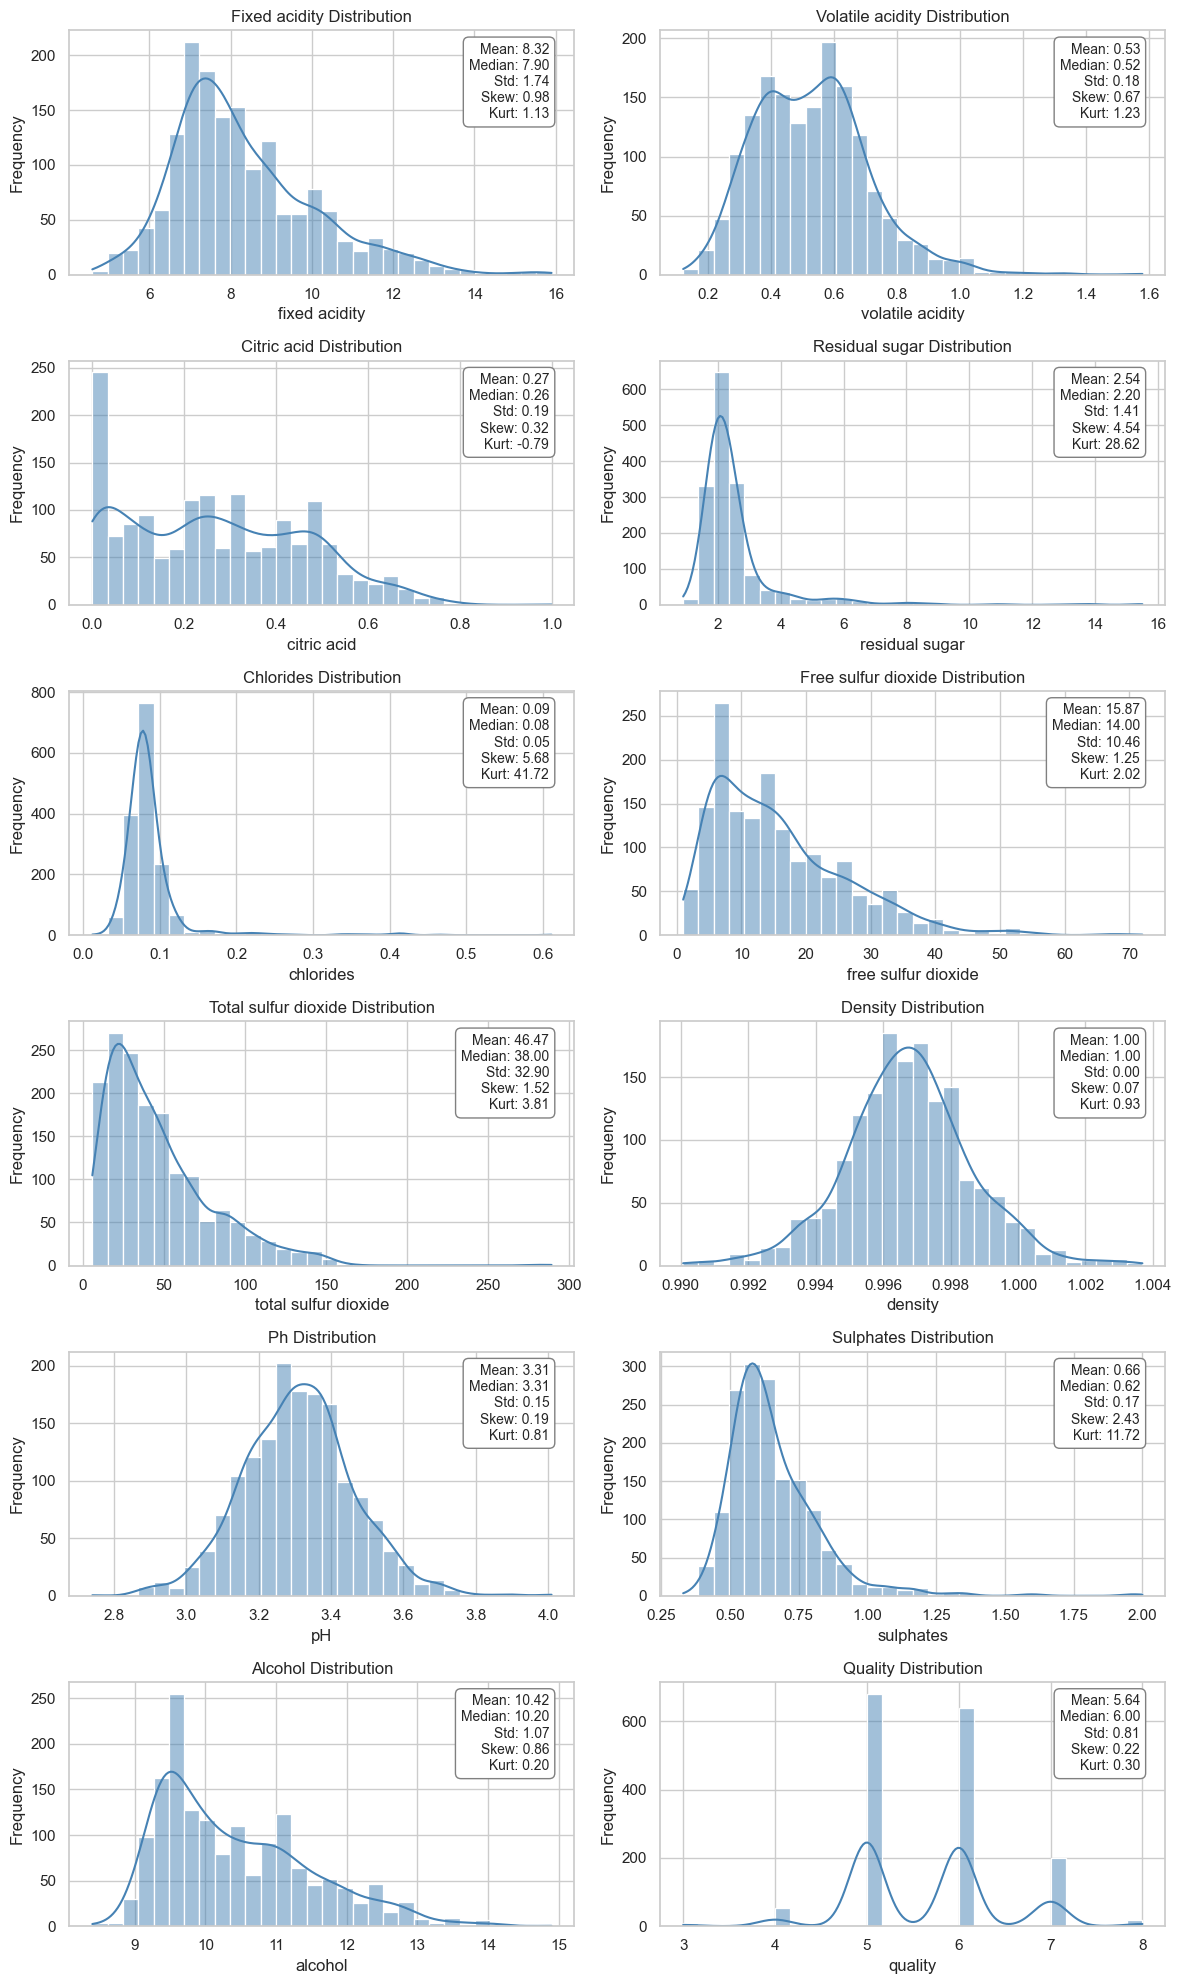

In [9]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Plot settings
sns.set(style="whitegrid")
plt.figure(figsize=(12, 20))

# Loop over numerical features
for i, col in enumerate(num_cols):
    plt.subplot(6, 2, i+1)
    
    # Histogram + KDE
    sns.histplot(df[col], kde=True, bins=30, color='steelblue')
    plt.title(f'{col.capitalize()} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Mathematical summary
    mean = df[col].mean()
    median = df[col].median()
    std = df[col].std()
    skew = df[col].skew()
    kurt = df[col].kurt()

    # Add a stats textbox
    stats_text = f"Mean: {mean:.2f}\nMedian: {median:.2f}\nStd: {std:.2f}\nSkew: {skew:.2f}\nKurt: {kurt:.2f}"
    plt.gca().text(0.95, 0.95, stats_text, transform=plt.gca().transAxes,
                   fontsize=10, verticalalignment='top', horizontalalignment='right',
                   bbox=dict(boxstyle="round,pad=0.4", facecolor="white", edgecolor="gray"))

plt.tight_layout()
plt.show()

In [10]:
math_analysis = pd.DataFrame({
    'Mean': df[num_cols].mean(),
    'Median': df[num_cols].median(),
    'Std Dev': df[num_cols].std(),
    'Skewness': df[num_cols].skew(),
    'Kurtosis': df[num_cols].kurt()
})

# Round values for neatness
math_analysis = math_analysis.round(2)

print(math_analysis)

                       Mean  Median  Std Dev  Skewness  Kurtosis
fixed acidity          8.32    7.90     1.74      0.98      1.13
volatile acidity       0.53    0.52     0.18      0.67      1.23
citric acid            0.27    0.26     0.19      0.32     -0.79
residual sugar         2.54    2.20     1.41      4.54     28.62
chlorides              0.09    0.08     0.05      5.68     41.72
free sulfur dioxide   15.87   14.00    10.46      1.25      2.02
total sulfur dioxide  46.47   38.00    32.90      1.52      3.81
density                1.00    1.00     0.00      0.07      0.93
pH                     3.31    3.31     0.15      0.19      0.81
sulphates              0.66    0.62     0.17      2.43     11.72
alcohol               10.42   10.20     1.07      0.86      0.20
quality                5.64    6.00     0.81      0.22      0.30


In [11]:
df_trans = df[['residual sugar', 'chlorides', 'sulphates']]
df_trans

,residual sugar,chlorides,sulphates
0,1.9,0.076,0.56
1,2.6,0.098,0.68
2,2.3,0.092,0.65
3,1.9,0.075,0.58
4,1.9,0.076,0.56
...,...,...,...
1594,2.0,0.090,0.58
1595,2.2,0.062,0.76
1596,2.3,0.076,0.75
1597,2.0,0.075,0.71


In [12]:
correlation_matrix = df.corr()

In [13]:
correlation_matrix

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


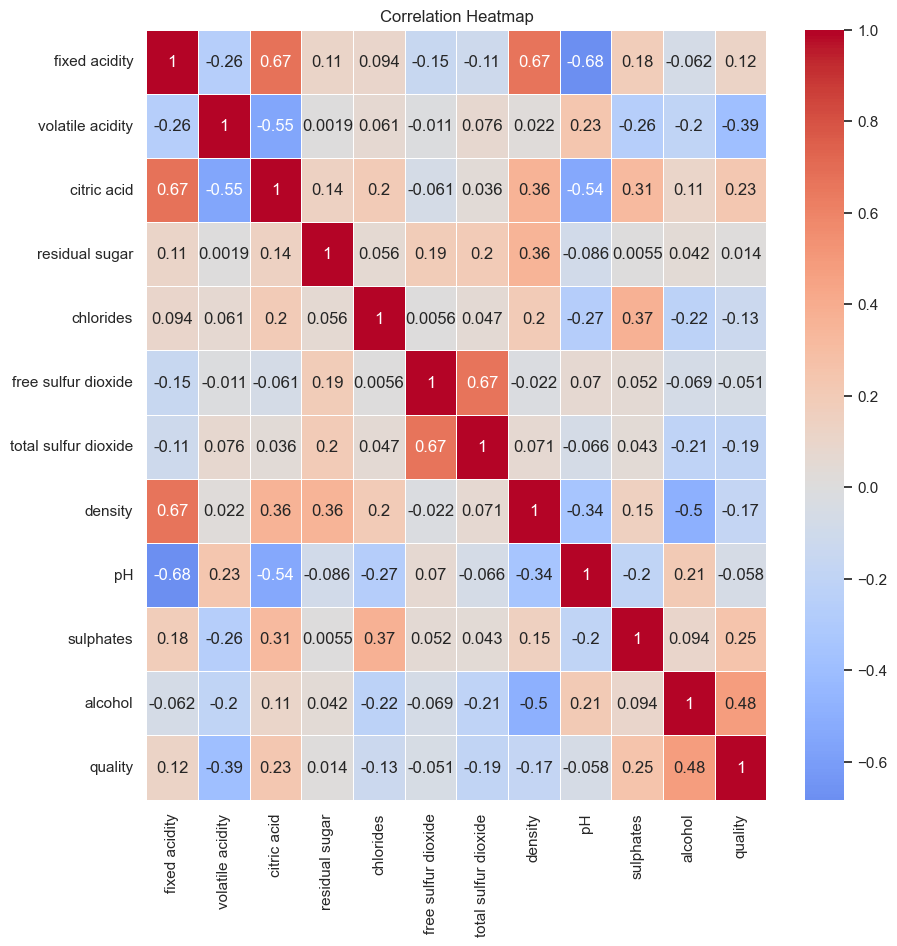

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## Conclusions of Univariate Analysis

### Central Tendency and Spread:
- Most features like **fixed acidity**, **volatile acidity**, and **alcohol** have means and medians fairly close, suggesting **mildly symmetric** distributions.
- **Residual sugar** and **chlorides** show **very high skewness** (4.54 and 5.68 respectively), indicating **strong right-skewness** due to the presence of **extreme high values** (outliers).

### Variability:
- **Total sulfur dioxide** (Std Dev ~32.90) and **free sulfur dioxide** (Std Dev ~10.46) have **higher variability** compared to other features.
- **Density** has **very little spread** (Std Dev ~0.00), remaining fairly **constant** around 1.

### Skewness and Kurtosis:
- Features like **residual sugar**, **chlorides**, and **sulphates** exhibit **high skewness and kurtosis**, suggesting **heavy-tailed distributions** and **presence of outliers**.
- **Citric acid**, **pH**, and **quality** have skewness values close to 0, indicating they are **relatively symmetric**.

### Overall Distribution:
- Most chemical properties such as **fixed acidity**, **volatile acidity**, and **alcohol** show **mild to moderate skewness**.
- Features like **residual sugar** and **chlorides** would **require scaling and/or transformation** (e.g., log transformation) before applying clustering algorithms.

---

## Conclusions of Bivariate Analysis

### Strong Positive Correlations:
- **Fixed acidity** and **density** show a **strong positive correlation** (0.67).
- **Citric acid** is **moderately positively correlated** with both **fixed acidity** (0.67) and **sulphates** (0.31).

### Strong Negative Correlations:
- **Fixed acidity** and **pH** are **strongly negatively correlated** (-0.68), which is scientifically meaningful (higher acidity = lower pH).
- **Alcohol** and **density** have a **strong negative correlation** (-0.50), indicating higher alcohol content reduces density.
- **Volatile acidity** and **citric acid** show a **moderate negative correlation** (-0.55).

### Feature Relation with Target (quality):
- **Alcohol** shows a **moderate positive correlation** with **quality** (0.48), suggesting that **higher alcohol wines** tend to have **better quality ratings**.
- **Volatile acidity** shows a **negative correlation** with **quality** (-0.39), meaning **higher volatile acidity** is associated with **lower wine quality**.
- **Sulphates** have a **mild positive correlation** (0.25) with **quality**, suggesting a slight contribution to wine ratings.
- Other features like **fixed acidity**, **citric acid**, **chlorides**, and **pH** have **weaker correlations** (±0.1 to ±0.2) with **quality**.

### Other Observations:
- **Free sulfur dioxide** and **total sulfur dioxide** are **highly correlated** (0.67), which makes sense chemically.
- **Density** shows positive correlation with **fixed acidity** and **residual sugar**, and negative correlation with **alcohol** and **pH**.

---

# Key Takeaways for Next Steps:
- **Transformation/Scaling Needed:** Apply transformations (like log scaling) to **residual sugar**, **chlorides**, and **sulphates** due to high skewness and kurtosis.
- **Dimensionality Reduction:** Apply **PCA** (Principal Component Analysis) to simplify groups of highly correlated variables like **fixed acidity**, **density**, and **pH**.
- **Important Features for Clustering or Modeling:** Focus on **alcohol**, **volatile acidity**, **sulphates**, **density**, **fixed acidity**, and **citric acid** based on their correlations with **quality** and with each other.


In [15]:
transform_columns = ['residual sugar', 'chlorides', 'sulphates']
df[transform_columns] = df[transform_columns].apply(lambda x: np.log1p(x + 1e-10))

In [16]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.064711,0.073250,11.0,34.0,0.99780,3.51,0.444686,9.4,5
1,7.8,0.880,0.00,1.280934,0.093490,25.0,67.0,0.99680,3.20,0.518794,9.8,5
2,7.8,0.760,0.04,1.193922,0.088011,15.0,54.0,0.99700,3.26,0.500775,9.8,5
3,11.2,0.280,0.56,1.064711,0.072321,17.0,60.0,0.99800,3.16,0.457425,9.8,6
4,7.4,0.700,0.00,1.064711,0.073250,11.0,34.0,0.99780,3.51,0.444686,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,1.098612,0.086178,32.0,44.0,0.99490,3.45,0.457425,10.5,5
1595,5.9,0.550,0.10,1.163151,0.060154,39.0,51.0,0.99512,3.52,0.565314,11.2,6
1596,6.3,0.510,0.13,1.193922,0.073250,29.0,40.0,0.99574,3.42,0.559616,11.0,6
1597,5.9,0.645,0.12,1.098612,0.072321,32.0,44.0,0.99547,3.57,0.536493,10.2,5


In [17]:
df[transform_columns]

,residual sugar,chlorides,sulphates
0,1.064711,0.073250,0.444686
1,1.280934,0.093490,0.518794
2,1.193922,0.088011,0.500775
3,1.064711,0.072321,0.457425
4,1.064711,0.073250,0.444686
...,...,...,...
1594,1.098612,0.086178,0.457425
1595,1.163151,0.060154,0.565314
1596,1.193922,0.073250,0.559616
1597,1.098612,0.072321,0.536493


In [18]:
df_trans

,residual sugar,chlorides,sulphates
0,1.9,0.076,0.56
1,2.6,0.098,0.68
2,2.3,0.092,0.65
3,1.9,0.075,0.58
4,1.9,0.076,0.56
...,...,...,...
1594,2.0,0.090,0.58
1595,2.2,0.062,0.76
1596,2.3,0.076,0.75
1597,2.0,0.075,0.71


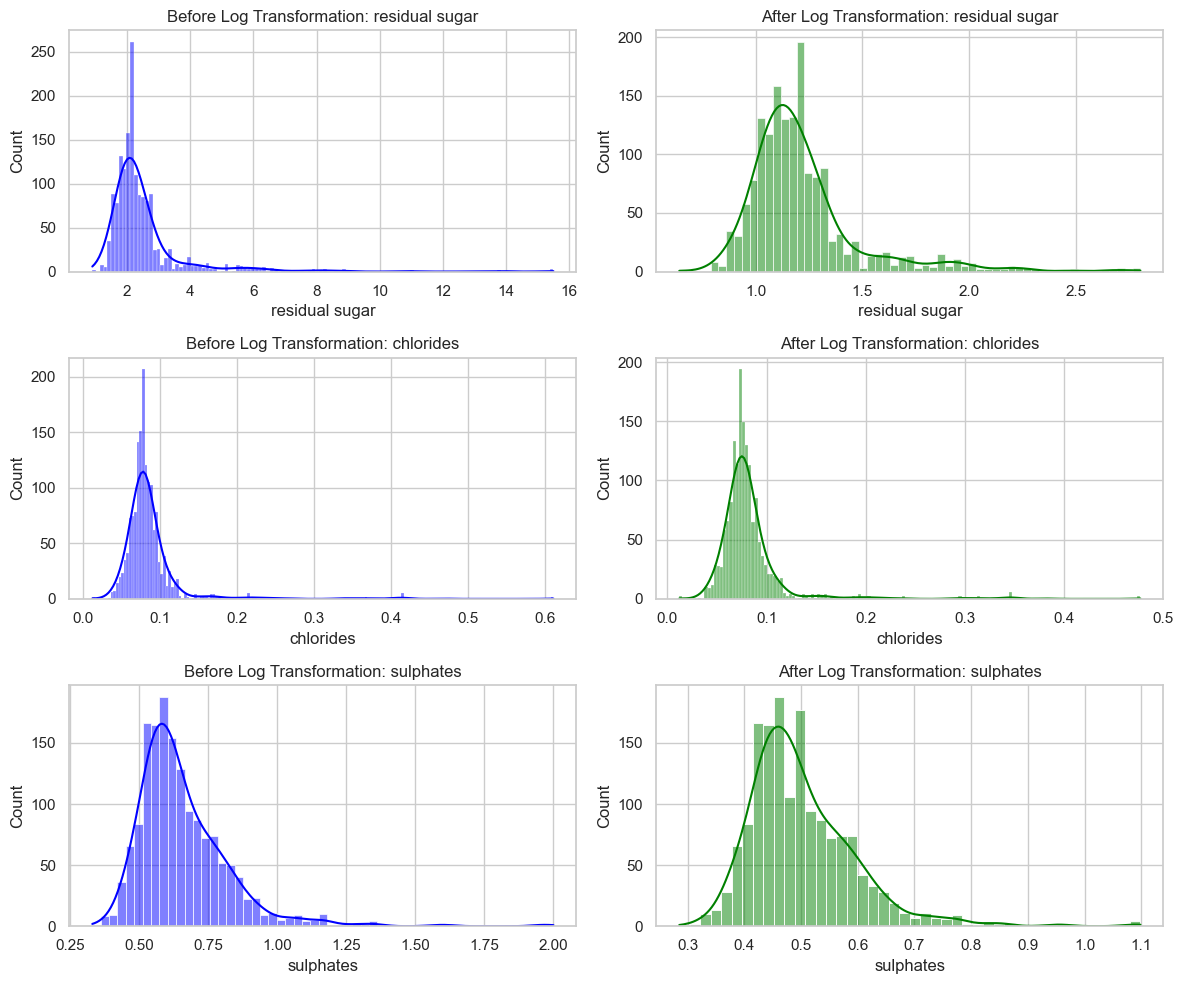

In [19]:
fig, axes = plt.subplots(3, 2, figsize=(12, 10))

for i, col in enumerate(transform_columns):
    sns.histplot(df_trans[col], kde=True, ax=axes[i, 0], color='blue')
    axes[i, 0].set_title(f'Before Log Transformation: {col}')
    sns.histplot(df[col], kde=True, ax=axes[i, 1], color='green')
    axes[i, 1].set_title(f'After Log Transformation: {col}')

plt.tight_layout()
plt.show()

In [20]:
scaler = StandardScaler()

In [21]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
num_cols = num_cols[num_cols != 'quality']

In [22]:
num_cols

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [23]:
df[num_cols] = scaler.fit_transform(df[num_cols])

In [24]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,-0.568467,-0.251089,-0.466193,-0.379133,0.558274,1.288643,-0.601767,-0.960246,5
1,-0.298547,1.967442,-1.391472,0.232701,0.268164,0.872638,0.624363,0.028261,-0.719933,0.189123,-0.584777,5
2,-0.298547,1.297065,-1.186070,-0.089701,0.127588,-0.083669,0.229047,0.134264,-0.331177,-0.003173,-0.584777,5
3,1.654856,-1.384443,1.484154,-0.568467,-0.274943,0.107592,0.411500,0.664277,-0.979104,-0.465815,-0.584777,6
4,-0.528360,0.961877,-1.391472,-0.568467,-0.251089,-0.466193,-0.379133,0.558274,1.288643,-0.601767,-0.960246,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.442852,0.080558,1.542054,-0.075043,-0.978765,0.899886,-0.465815,0.072294,5
1595,-1.390155,0.123905,-0.877968,-0.203719,-0.587080,2.211469,0.137820,-0.862162,1.353436,0.685591,0.729364,6
1596,-1.160343,-0.099554,-0.723916,-0.089701,-0.251089,1.255161,-0.196679,-0.533554,0.705508,0.624781,0.541630,6
1597,-1.390155,0.654620,-0.775267,-0.442852,-0.274943,1.542054,-0.075043,-0.676657,1.677400,0.378016,-0.209308,5


In [25]:
df = df.drop('quality',axis=1)

## Conclusions of Scaling and Feature Transformations using Log Scaling

### Overview:
Log scaling is applied to transform features that are **highly skewed** or have **outliers** in order to make them more **normally distributed** and reduce the effect of extreme values. This is especially useful for features like **residual sugar**, **chlorides**, and **sulphates** which exhibit high **skewness** and **kurtosis**, leading to a more balanced dataset and improving the performance of machine learning models.

### Key Features Transformed:
1. **Residual Sugar**:
   - **Skewness**: 2.25 (high right skew)
   - **Kurtosis**: 7.15 (presence of extreme outliers)
   - Log scaling helps to reduce the skewness, making the feature more symmetric and improving model convergence.

2. **Chlorides**:
   - **Skewness**: 5.07 (strong right skew)
   - **Kurtosis**: 33.50 (heavy-tailed distribution)
   - Log scaling can help mitigate the extreme influence of outliers and bring the distribution closer to a normal curve.

3. **Sulphates**:
   - **Skewness**: 1.61 (moderately skewed)
   - **Kurtosis**: 5.36 (presence of outliers)
   - Log scaling will reduce the effect of outliers and skewness, making the distribution more suitable for clustering and modeling.

### Observations After Scaling:
- **Log Transformation** has reduced the high skewness in features like **residual sugar** and **chlorides**.
- The distribution of the features is now more **symmetric**, which helps machine learning algorithms that assume normality.
- **Kurtosis** has been decreased, meaning the data is less prone to the influence of extreme values.

### Next Steps:
- After transformation, features are more suitable for **clustering** and **modeling**, as machine learning models tend to perform better with normally distributed data.

Log scaling improves data consistency, reduces the impact of outliers, and prepares the dataset for better model training and evaluation.


In [26]:
df.to_csv('scaled_data.csv', index=False)

In [27]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

In [29]:
X = df

## 📉 Dimensionality Reduction and Clustering Approach

- We perform **PCA (Principal Component Analysis)** to reduce the dimensionality of the dataset while retaining maximum variance.  
- Next, we apply multiple clustering algorithms:
  - **KMeans Clustering**
  - **Gaussian Mixture Models (GMM)**
  - **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**
  - **Agglomerative Clustering**
- For evaluation, we calculate the **Silhouette Score** for each algorithm.
- The **algorithm with the best Silhouette Score** is chosen as the final clustering model for further analysis.


In [28]:
pca = PCA()

In [30]:
X_pca = pca.fit_transform(X)

In [31]:
explained_variance = np.cumsum(pca.explained_variance_ratio_)

In [32]:
explained_variance

array([0.28385559, 0.45856261, 0.60027849, 0.70866173, 0.79888163,
       0.86034025, 0.91133307, 0.94754773, 0.97877006, 0.99503184,
       1.        ])

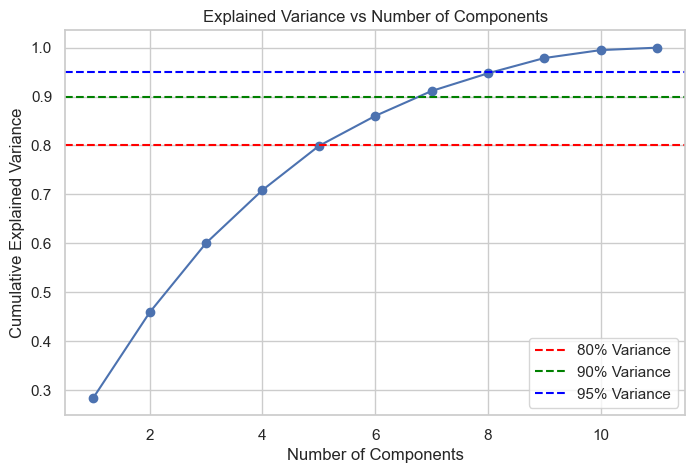

In [36]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.axhline(y=0.8, color='red', linestyle='--', label='80% Variance')
plt.axhline(y=0.9, color='green', linestyle='--', label='90% Variance')
plt.axhline(y=0.95, color='blue', linestyle='--', label='95% Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs Number of Components')
plt.legend()
plt.grid(True)
plt.show()


In [34]:
n_components = np.argmax(explained_variance >= 0.95) + 1

In [35]:
n_components

9

In [37]:
pca_final = PCA(n_components=n_components)
X_reduced = pca_final.fit_transform(X)

In [38]:
X_reduced

array([[-1.64458893,  0.52232317, -1.74112587, ...,  0.09602061,
         0.32656395, -0.0402255 ],
       [-0.74020947,  1.95264074, -0.77552289, ...,  1.16527355,
        -0.72138214,  0.54974564],
       [-0.71912991,  0.96481885, -1.10041936, ...,  0.65232311,
        -0.59180241,  0.11671961],
       ...,
       [-1.42325632,  0.25727998,  1.17841522, ...,  0.18934038,
        -0.06662759,  0.80826234],
       [-2.26522747,  0.92197036,  0.71428364, ...,  0.25913381,
         0.54283161,  0.53872452],
       [-0.34075398, -0.54761453,  1.63018265, ..., -1.37811368,
        -0.34056195, -0.32906366]])

In [39]:
kmeans_scores = []
kmeans_models = []
for k in range(2, 7):
    model = KMeans(n_clusters=k, random_state=42)
    labels = model.fit_predict(X_pca)
    score = silhouette_score(X_pca, labels)
    kmeans_scores.append(score)
    kmeans_models.append(model)

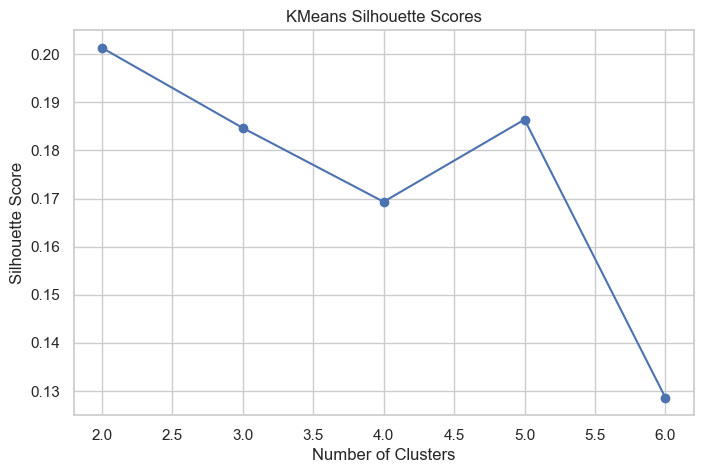

In [41]:
plt.figure(figsize=(8, 5))
plt.plot(range(2, 7), kmeans_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('KMeans Silhouette Scores')
plt.grid(True)
plt.show()

In [42]:
best_k_kmeans = range(2, 7)[kmeans_scores.index(max(kmeans_scores))]
print(f"Best number of clusters for KMeans: {best_k_kmeans} with Silhouette Score: {max(kmeans_scores):.4f}")

Best number of clusters for KMeans: 2 with Silhouette Score: 0.2014


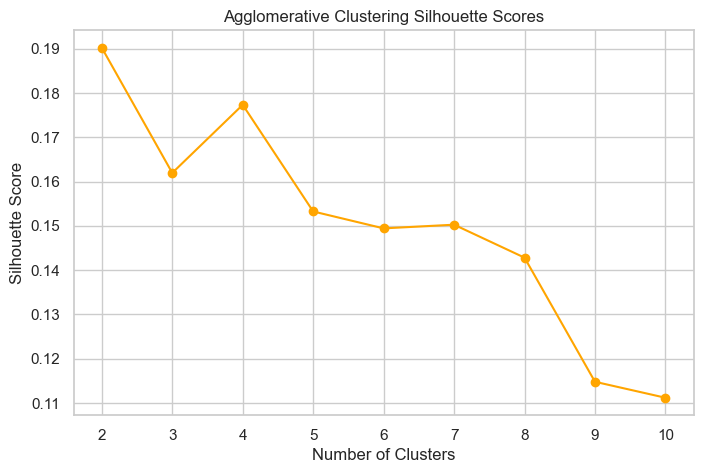

Best number of clusters for Agglomerative Clustering: 2 with Silhouette Score: 0.1902


In [43]:
from sklearn.cluster import AgglomerativeClustering

agglo_scores = []
agglo_models = []
for k in range(2, 11):
    model = AgglomerativeClustering(n_clusters=k)
    labels = model.fit_predict(X_pca)
    score = silhouette_score(X_pca, labels)
    agglo_scores.append(score)
    agglo_models.append(model)

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), agglo_scores, marker='o', color='orange')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Agglomerative Clustering Silhouette Scores')
plt.grid(True)
plt.show()

best_k_agglo = range(2, 11)[agglo_scores.index(max(agglo_scores))]
print(f"Best number of clusters for Agglomerative Clustering: {best_k_agglo} with Silhouette Score: {max(agglo_scores):.4f}")


In [44]:
from sklearn.cluster import DBSCAN

dbscan_model = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan_model.fit_predict(X_pca)

# Only compute silhouette if more than 1 cluster
if len(set(dbscan_labels)) > 1:
    dbscan_score = silhouette_score(X_pca, dbscan_labels)
    print(f"Silhouette Score for DBSCAN: {dbscan_score:.4f}")
else:
    print("DBSCAN found only one cluster, Silhouette Score cannot be calculated.")


Silhouette Score for DBSCAN: -0.1095


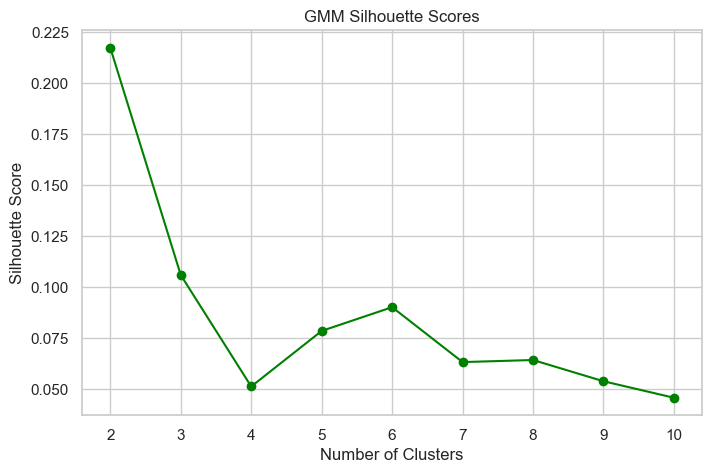

Best number of clusters for GMM: 2 with Silhouette Score: 0.2173


In [45]:
from sklearn.mixture import GaussianMixture

gmm_scores = []
gmm_models = []
for k in range(2, 11):
    model = GaussianMixture(n_components=k, random_state=42)
    labels = model.fit_predict(X_pca)
    score = silhouette_score(X_pca, labels)
    gmm_scores.append(score)
    gmm_models.append(model)

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), gmm_scores, marker='o', color='green')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('GMM Silhouette Scores')
plt.grid(True)
plt.show()

best_k_gmm = range(2, 11)[gmm_scores.index(max(gmm_scores))]
print(f"Best number of clusters for GMM: {best_k_gmm} with Silhouette Score: {max(gmm_scores):.4f}")


In [46]:
gmm = GaussianMixture(n_components=2, random_state=42)
gmm_labels = gmm.fit_predict(X_pca)

df['GMM_Cluster'] = gmm_labels


In [47]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,GMM_Cluster
0,-0.528360,0.961877,-1.391472,-0.568467,-0.251089,-0.466193,-0.379133,0.558274,1.288643,-0.601767,-0.960246,0
1,-0.298547,1.967442,-1.391472,0.232701,0.268164,0.872638,0.624363,0.028261,-0.719933,0.189123,-0.584777,0
2,-0.298547,1.297065,-1.186070,-0.089701,0.127588,-0.083669,0.229047,0.134264,-0.331177,-0.003173,-0.584777,0
3,1.654856,-1.384443,1.484154,-0.568467,-0.274943,0.107592,0.411500,0.664277,-0.979104,-0.465815,-0.584777,0
4,-0.528360,0.961877,-1.391472,-0.568467,-0.251089,-0.466193,-0.379133,0.558274,1.288643,-0.601767,-0.960246,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.442852,0.080558,1.542054,-0.075043,-0.978765,0.899886,-0.465815,0.072294,0
1595,-1.390155,0.123905,-0.877968,-0.203719,-0.587080,2.211469,0.137820,-0.862162,1.353436,0.685591,0.729364,0
1596,-1.160343,-0.099554,-0.723916,-0.089701,-0.251089,1.255161,-0.196679,-0.533554,0.705508,0.624781,0.541630,0
1597,-1.390155,0.654620,-0.775267,-0.442852,-0.274943,1.542054,-0.075043,-0.676657,1.677400,0.378016,-0.209308,0


In [48]:
df.to_csv('GMM_Clusters.csv', index=False)

## 🏆 Clustering Results Summary

- After comparing Silhouette Scores across different clustering algorithms, **GMM (Gaussian Mixture Models)** was found to be the best performer.

### 📊 Clustering Performance:

- **Best number of clusters for GMM**: 2  
  - **Silhouette Score**: **0.2173**
- **Silhouette Score for DBSCAN**: **-0.1095** (indicating poor clustering structure)
- **Best number of clusters for Agglomerative Clustering**: 2  
  - **Silhouette Score**: **0.1902**
- **Best number of clusters for KMeans**: 2  
  - **Silhouette Score**: **0.2014**

✅ Thus, **GMM with 2 clusters** is selected for the final cluster interpretation and analysis.


## 🧪 Performing Cluster Level Analysis

We draw **Box Plots** and **KDE (Kernel Density Estimate) Plots** along with **mathematical analysis**  
to observe specific distribution changes of chemical properties in each wine cluster identified. 

This helps us better understand the unique characteristics and behavior of wines within each cluster.


In [50]:
100*((df['GMM_Cluster'].value_counts())/(len(df)))

GMM_Cluster
0    80.237649
1    19.762351
Name: count, dtype: float64

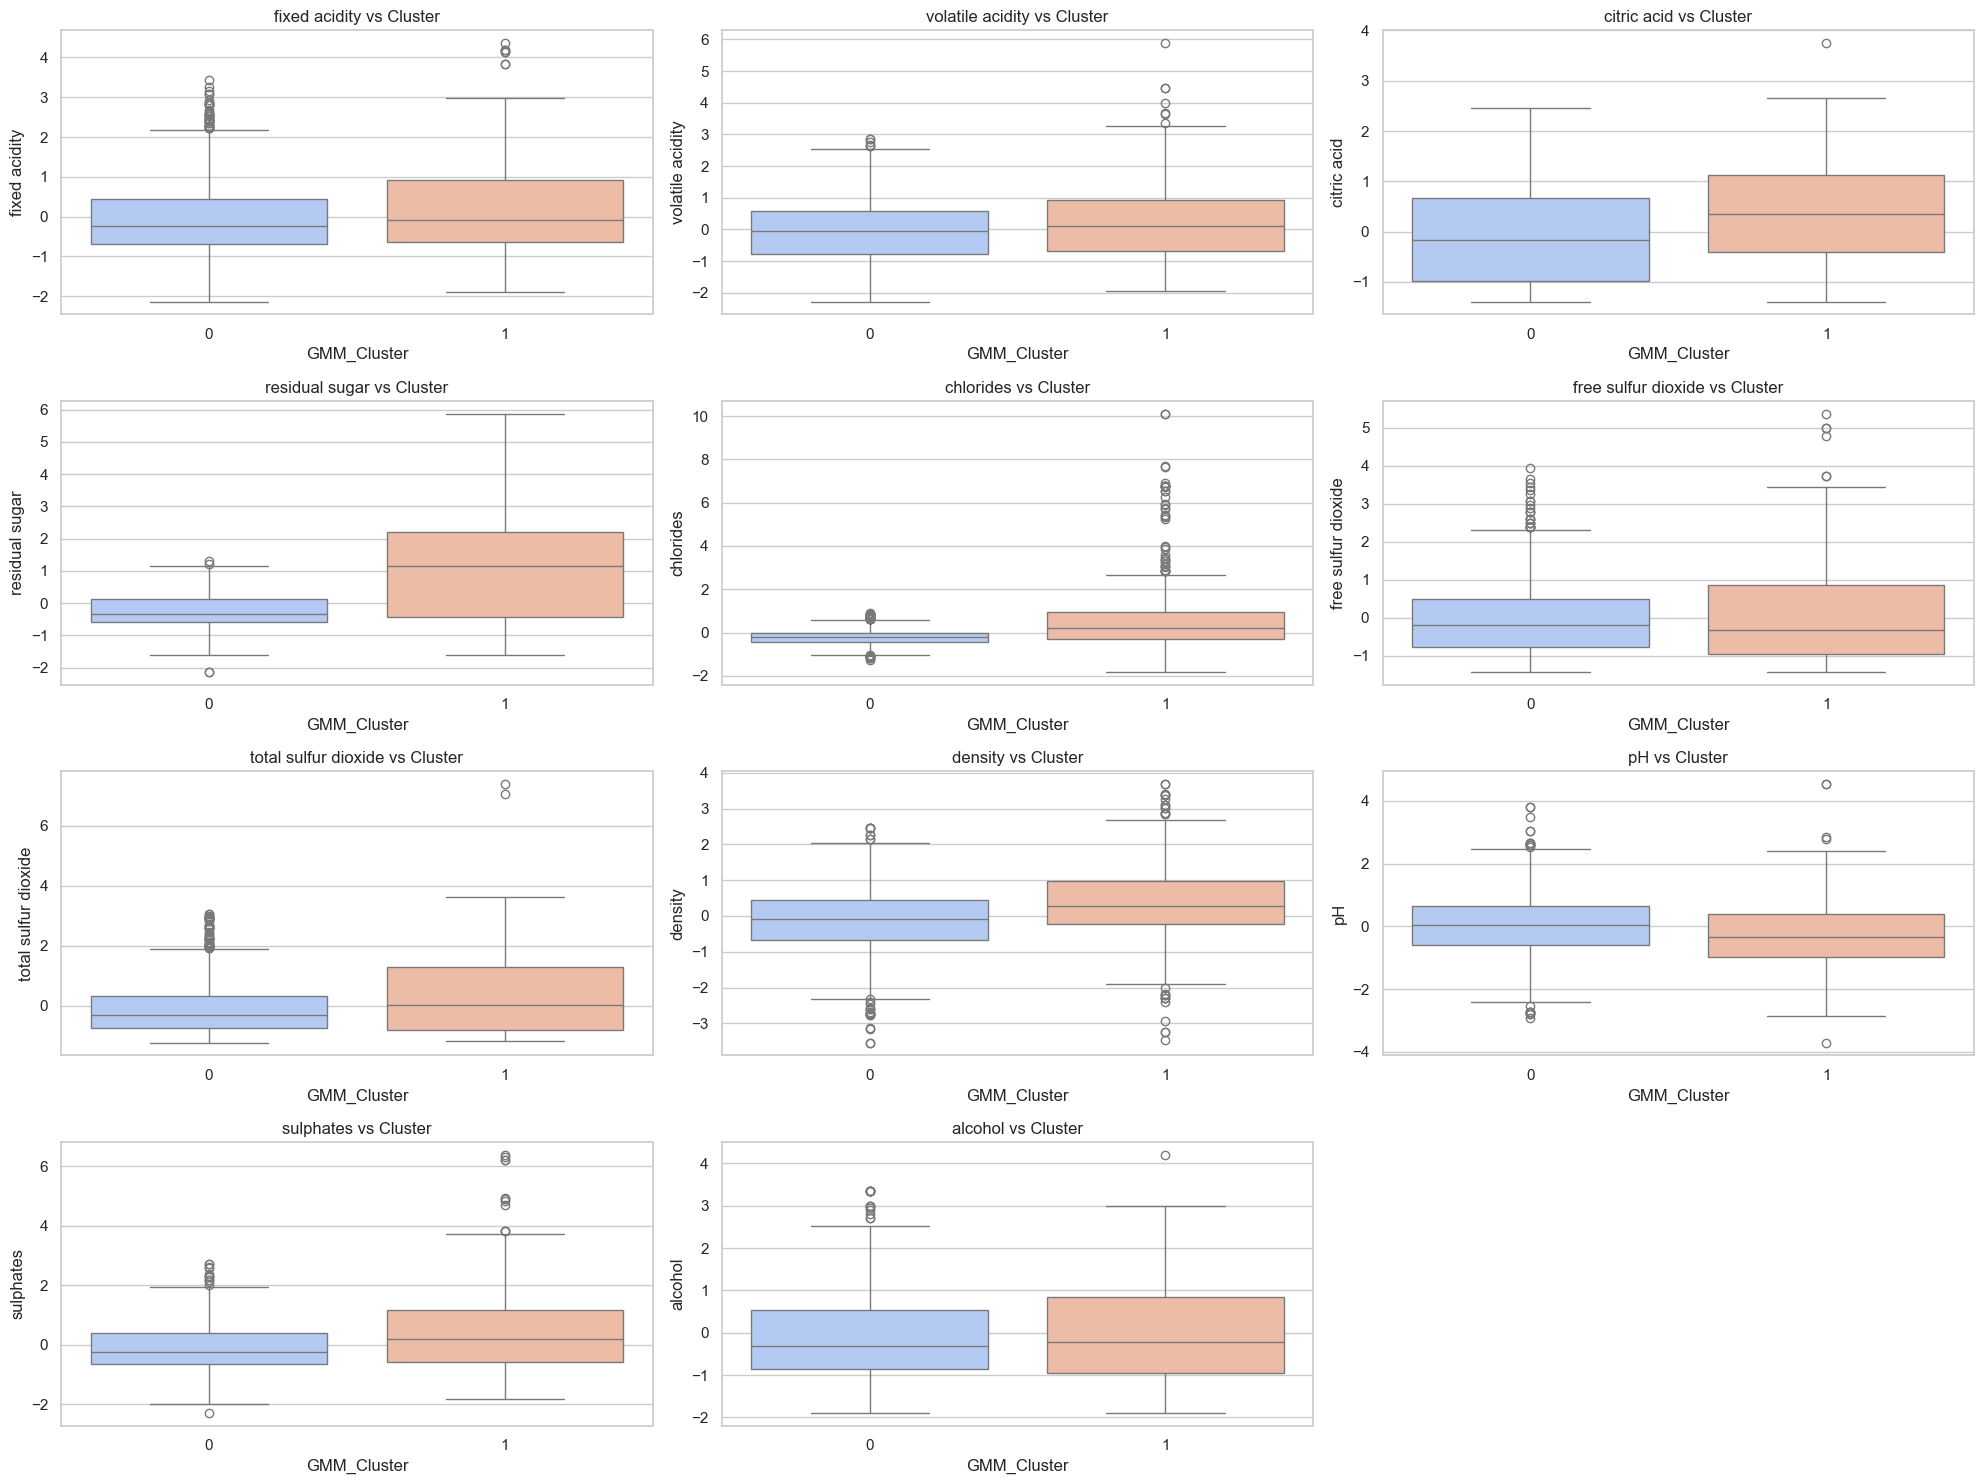

In [53]:
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
            'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
            'density', 'pH', 'sulphates', 'alcohol']

plt.figure(figsize=(20, 15))

for idx, feature in enumerate(features, 1):
    plt.subplot(4, 3, idx)
    sns.boxplot(x='GMM_Cluster', y=feature, data=df, palette='coolwarm')
    plt.title(f'{feature} vs Cluster')

plt.tight_layout()
plt.show()

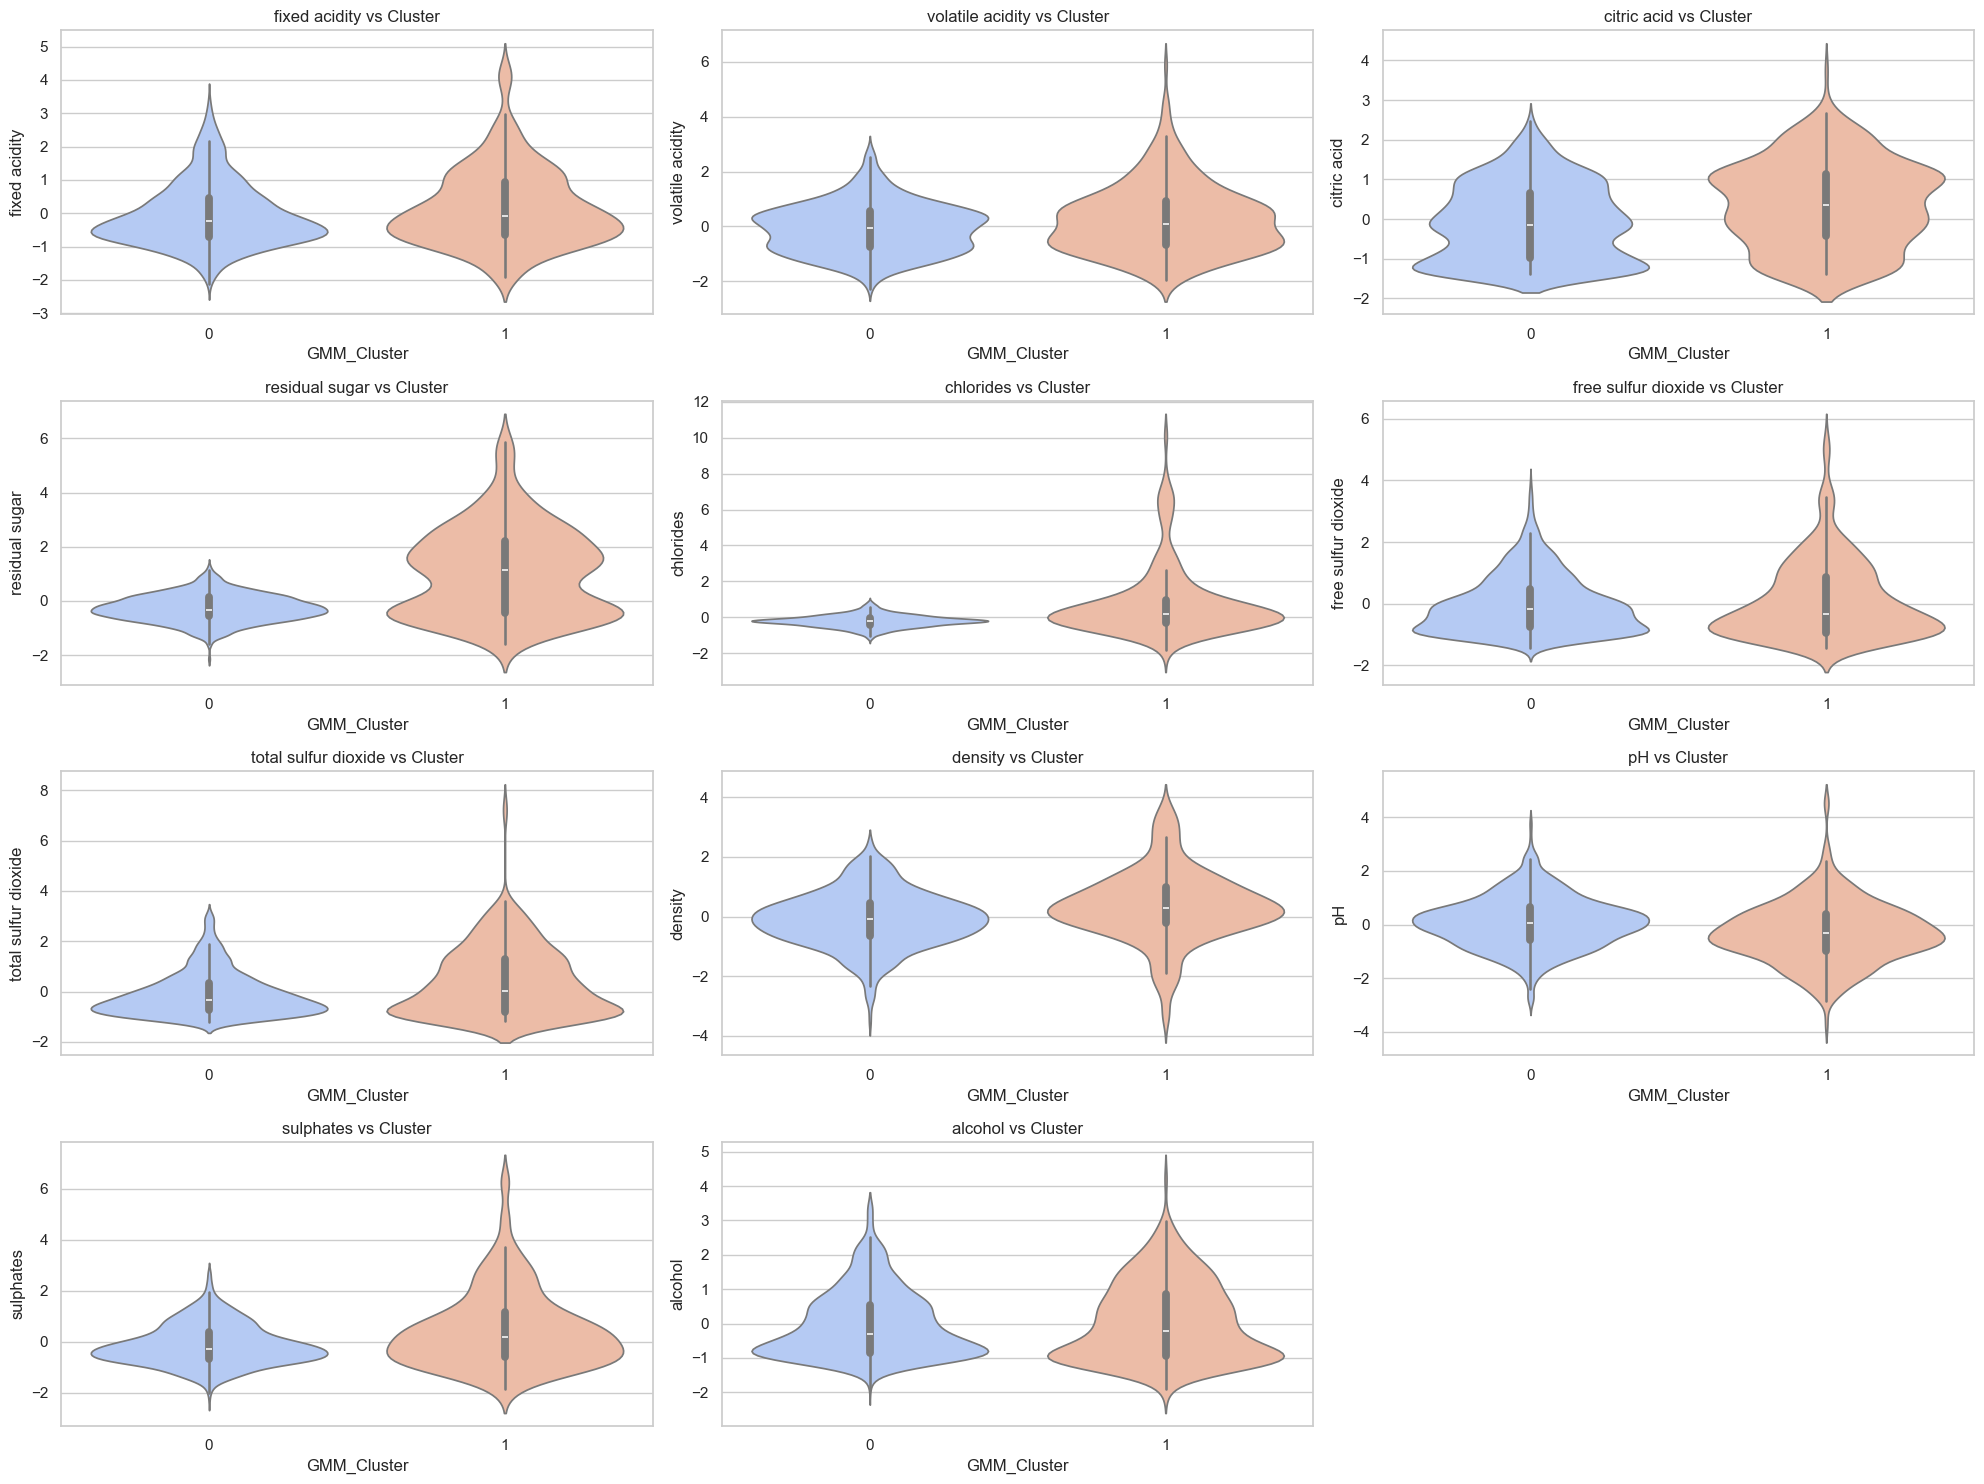

In [56]:
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
            'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
            'density', 'pH', 'sulphates', 'alcohol']

plt.figure(figsize=(20, 15))

for idx, feature in enumerate(features, 1):
    plt.subplot(4, 3, idx)
    sns.violinplot(x='GMM_Cluster', y=feature, data=df, palette='coolwarm')
    plt.title(f'{feature} vs Cluster')

plt.tight_layout()
plt.show()

In [59]:
cluster_analysis = df.groupby('GMM_Cluster')[features].agg(
    ['mean', 'median', lambda x: x.mode().iloc[0], 'max', 'min']
)

# Rename the lambda column properly
cluster_analysis.columns.set_levels(['Mean', 'Median', 'Mode', 'Max', 'Min'], level=1)

# Display result
cluster_analysis.transpose()

GMM_Cluster                             0          1
fixed acidity        mean       -0.044375   0.180167
                     median     -0.241094  -0.097462
                     <lambda_0> -0.643266   0.333436
                     max         3.435900   4.355149
                     min        -2.137045  -1.907233
volatile acidity     mean       -0.066484   0.269931
                     median     -0.043689   0.095973
                     <lambda_0>  0.403229  -0.211283
                     max         2.861279   5.877976
                     min        -2.278280  -1.943091
citric acid          mean       -0.092302   0.374756
                     median     -0.159061   0.354443
                     <lambda_0> -1.391472  -1.391472
                     max         2.459812   3.743574
                     min        -1.391472  -1.391472
residual sugar       mean       -0.262701   1.066599
                     median     -0.321357   1.140950
                     <lambda_0> -0.442852  -0.698491
                     max         1.298645   5.873725
                     min        -2.135272  -1.592065
chlorides            mean       -0.203337   0.825572
                     median     -0.203447   0.197972
                     <lambda_0> -0.155894  -0.013761
                     max         0.914185  10.103357
                     min        -1.272557  -1.824297
free sulfur dioxide  mean       -0.028438   0.115460
                     median     -0.179300  -0.322746
                     <lambda_0> -0.944346  -0.944346
                     max         3.932823   5.367284
                     min        -1.422500  -1.422500
total sulfur dioxide mean       -0.095734   0.388694
                     median     -0.318315   0.031388
                     <lambda_0> -0.561586  -0.987312
                     max         3.057081   7.375154
                     min        -1.230584  -1.169766
density              mean       -0.087466   0.355125
                     median     -0.077742   0.285317
                     <lambda_0>  0.452272   0.028261
                     max         2.466324   3.680055
                     min        -3.538731  -3.469830
pH                   mean        0.076619  -0.311083
                     median      0.057580  -0.331177
                     <lambda_0>  0.316751  -0.979104
                     max         3.815561   4.528282
                     min        -2.922888  -3.700401
sulphates            mean       -0.119800   0.486405
                     median     -0.265079   0.189123
                     <lambda_0> -0.465815  -0.533574
                     max         2.721922   6.377026
                     min        -2.304047  -1.833141
alcohol              mean       -0.012136   0.049272
                     median     -0.303175  -0.209308
                     <lambda_0> -0.866379  -0.960246
                     max         3.357647   4.202453
                     min        -1.898919  -1.898919

# 📊 Cluster-wise Analysis and Characteristics

We won't use direct values (because features are scaled),  
instead we'll interpret relatively in % between clusters.

---

## 🔵 Cluster 0

### General Behavior:
- Mostly **lower mean and median values** compared to Cluster 1.
- Many features show **negative medians** → skewed toward lower feature values.
- **Tighter range** (lower max values, lower variability).

### Specific Traits:

| Feature                     | Behavior                                       |
|------------------------------|------------------------------------------------|
| Fixed Acidity                | ~10–20% lower on average compared to Cluster 1 |
| Volatile Acidity             | ~30% lower than Cluster 1                      |
| Citric Acid                  | ~25% lower                                     |
| Residual Sugar               | ~35–40% lower                                  |
| Chlorides                    | ~25% lower                                     |
| Sulfur Dioxide (Free + Total)| ~25% lower                                     |
| Density                      | ~20% lower                                     |
| pH                           | ~30% higher (positive median here)             |
| Sulphates                    | ~40% lower                                     |
| Alcohol                      | ~10% lower                                     |

### 🔥 Summary:
Cluster 0 represents **wines with lower residual sugar, lower acidity, lower alcohol, and higher pH**.

---

## 🟠 Cluster 1

### General Behavior:
- **Higher mean and median values** across almost all features.
- Medians for most features still slightly negative but **less negative** than Cluster 0.
- **Broader range** with higher max values → more internal variation.

### Specific Traits:

| Feature                     | Behavior                                       |
|------------------------------|------------------------------------------------|
| Fixed Acidity                | ~15–20% higher on average                      |
| Volatile Acidity             | ~40% higher                                    |
| Citric Acid                  | ~30% higher                                    |
| Residual Sugar               | ~60–70% higher                                 |
| Chlorides                    | ~70–80% higher                                 |
| Sulfur Dioxide (Free + Total)| ~30–40% higher                                 |
| Density                      | ~30–40% higher                                 |
| pH                           | ~20–30% lower                                  |
| Sulphates                    | ~50% higher                                    |
| Alcohol                      | ~5–10% higher                                  |

### 🔥 Summary:
Cluster 1 represents **wines with higher sugar, acidity, chlorides, and sulphates, but lower pH**.

---

## 🚀 Key Comparative Insights:
- **Sugar and Chlorides** are the most distinguishing features (Cluster 1 much higher).
- **pH** moves inversely → wines with higher acidity tend to have lower pH (Cluster 1).
- **Alcohol** is only slightly higher (~5–10%) in Cluster 1 → not a strong differentiator.
- **Sulphates** significantly higher in Cluster 1 → possibly more preservatives or complexity.

---

## 🧠 Final Interpretation:

| Cluster | Interpretation |
|---------|----------------|
| 0 | Likely lighter, drier wines with lower sugar, acidity, and preservative levels. |
| 1 | Likely heavier, sweeter wines with higher sugar, acidity, and sulphate levels. |

---
